In [540]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Introduction

Anime or Japanese animation, has become a global phenomenon in the past decade with millions of households streaming anime online (Padington and Youngs).
New anime series are broadcasted on different streaming services quarterly and exclusive titles can bring a lot of traction to a platform. 
Some platforms are dedicated to specifically streaming anime, but services which have a variety of other programming like Netflix, Hulu, or HBO MAX, could benefit from licensing anime. 

For our project, we are using the website MyAnimeList and Jikan API to request data on anime titles that are released quarterly for streaming. MyAnimeList is an anime and manga database 
where users can catalog their favorite series from the database into personalized lists and socialize with a community of fans. The database tracks the new yearly releases of anime for each 
season of the year: winter, spring, summer, and fall. Using the website’s API, we can request data about the new shows released for each season of the year and combine data sets to determine 
information about top-ranking genres for the season. Unfortunately, we experienced some difficulty acquiring authentication with the official MyAnimeList API, so due to the time constraint we decided 
to use an official API called Jikan. The Jikan API returns similar data about anime in the MyAnimeList database with HTML endpoints for data related to the title, episode count, ratings, scores, and more. 

As such, our goal is to use this API to find the best genres of anime that appeal to the greater audience at different times of years and other metric data that could be useful in explaining anime 
preferences for streaming. The columns of interest here are our main time column ‘years’ that represents the year the anime was released. In addition, we have columns like popularity, 
ranking of the anime for that time, and a score rating out of 10. Using these, we can make comparisons across the seasons or years to show any findings on the changes of the three ratings for different genres. 


# Method

From our API rate limit, we are focusing on creating a dataframe that takes in all the anime of the requested year from the first page of the site into a large dataframe. 
To data cleaning level 1, we check our columns for any columns that aren't easily codable. For the genre columns, we changed values with spaces and dashes into underscores. For example, we switched Sci-Fi to Sci_Fi. We also switched the index two indices to mal_id and season identifiable by the time of the year and their unique ids. 

To data cleaning level 2, the ‘genres’ column when imported into a dataframe stored the different genres of an anime into dictionaries in the key named “name”. Some anime have multiple genres which made it difficult to immediately start working on using the genres to sort the anime. This made visualizing them difficult as some of them would fit multiple categories. To split up the ‘genres’ column, we use a function called genreCol with a dataframe as a parameter to help divide the genre column. We first created a list called genreList that contains a list of all the genres included in the MyAnimeList API. This list is looped through in a for loop so that each iteration will be checking each genre. We then create a dictionary with each genre as a key. Next, another for loop is used to loop through the ‘genres’ column for each of the different anime in the dataframe and setting that to 0. Using another for loop, we loop through the list of dictionaries containing the genres of the anime in the ‘name’ key. If the current genre has not been found yet as noted by the dictionary value still being 0, the code checks if the genre matches and changes it to True. Otherwise the row is false if no genre is found.

For data cleaning level 3, we keep the missing values in the dataframe that come from the API. These missing values are associated with genre columns that did not exist for the range of the API we were able to access within our limitations.

# Preprocessing

# API Requests

In [541]:
url_winter = 'https://api.jikan.moe/v4/seasons/2022/winter'
response_winter = requests.get(url_winter)
response_winter.status_code

200

In [542]:
url_spring = 'https://api.jikan.moe/v4/seasons/2022/spring'
response_spring = requests.get(url_spring)
response_spring.status_code

200

In [543]:
url_summer = 'https://api.jikan.moe/v4/seasons/2022/summer'
response_summer = requests.get(url_summer)
response_summer.status_code

200

In [544]:
url_fall = 'https://api.jikan.moe/v4/seasons/2022/fall'
response_fall = requests.get(url_fall)
response_fall.status_code

200

# Initializing and Combine Datasets

In [545]:
winter_data_pd = pd.DataFrame(response_winter.json()['data'])
spring_data_pd = pd.DataFrame(response_spring.json()['data'])
summer_data_pd = pd.DataFrame(response_summer.json()['data'])
fall_data_pd = pd.DataFrame(response_fall.json()['data'])

In [546]:
data_pd = pd.concat([winter_data_pd, spring_data_pd, summer_data_pd, fall_data_pd], ignore_index=True)
data_pd

,mal_id,url,images,trailer,approved,titles,title,title_english,title_japanese,title_synonyms,...,season,year,broadcast,producers,licensors,studios,genres,explicit_genres,themes,demographics
0,47778,https://myanimelist.net/anime/47778/Kimetsu_no...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'QwvWdnd2Ktg', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Kimetsu no Yaib...",Kimetsu no Yaiba: Yuukaku-hen,Demon Slayer: Kimetsu no Yaiba Entertainment D...,鬼滅の刃 遊郭編,[],...,winter,2022,"{'day': 'Sundays', 'time': '23:15', 'timezone'...","[{'mal_id': 17, 'type': 'anime', 'name': 'Anip...","[{'mal_id': 493, 'type': 'anime', 'name': 'Ani...","[{'mal_id': 43, 'type': 'anime', 'name': 'ufot...","[{'mal_id': 1, 'type': 'anime', 'name': 'Actio...",[],"[{'mal_id': 13, 'type': 'anime', 'name': 'Hist...","[{'mal_id': 27, 'type': 'anime', 'name': 'Shou..."
1,48583,https://myanimelist.net/anime/48583/LETS_ALL_L...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'EIVVnLlhzr0', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'LET'S ALL LOVE ...",LET'S ALL LOVE LAIN,LET'S ALL LOVE LAIN,進撃の巨人 The Final Season Part 2,[LET'S ALL LOVE LAIN],...,winter,2022,"{'day': 'Mondays', 'time': '00:05', 'timezone'...","[{'mal_id': 10, 'type': 'anime', 'name': 'Prod...",[],"[{'mal_id': 569, 'type': 'anime', 'name': 'MAP...","[{'mal_id': 1, 'type': 'anime', 'name': 'Actio...",[],"[{'mal_id': 58, 'type': 'anime', 'name': 'Gore...","[{'mal_id': 27, 'type': 'anime', 'name': 'Shou..."
2,48736,https://myanimelist.net/anime/48736/Sono_Bisqu...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'tFKDKd8z-NU', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Sono Bisque Dol...",Sono Bisque Doll wa Koi wo Suru,My Dress-Up Darling,その着せ替え人形は恋をする,"[Sono Kisekae Ningyou wa Koi wo Suru, KiseKoi]",...,winter,2022,"{'day': 'Sundays', 'time': '00:00', 'timezone'...","[{'mal_id': 17, 'type': 'anime', 'name': 'Anip...",[],"[{'mal_id': 1835, 'type': 'anime', 'name': 'Cl...","[{'mal_id': 22, 'type': 'anime', 'name': 'Roma...",[],"[{'mal_id': 69, 'type': 'anime', 'name': 'Otak...","[{'mal_id': 42, 'type': 'anime', 'name': 'Sein..."
3,40507,https://myanimelist.net/anime/40507/Arifureta_...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'JoFedOjH1uY', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Arifureta Shoku...",Arifureta Shokugyou de Sekai Saikyou 2nd Season,Arifureta: From Commonplace to World's Stronge...,ありふれた職業で世界最強 2nd Season,[From Common Job Class to the Strongest in the...,...,winter,2022,"{'day': 'Thursdays', 'time': '23:30', 'timezon...",[],[],"[{'mal_id': 163, 'type': 'anime', 'name': 'asr...","[{'mal_id': 1, 'type': 'anime', 'name': 'Actio...",[],"[{'mal_id': 35, 'type': 'anime', 'name': 'Hare...",[]
4,47159,https://myanimelist.net/anime/47159/Tensai_Ouj...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'TxWHJz8Gg_E', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Tensai Ouji no ...",Tensai Ouji no Akaji Kokka Saisei Jutsu,The Genius Prince's Guide to Raising a Nation ...,天才王子の赤字国家再生術,[],...,winter,2022,"{'day': 'Tuesdays', 'time': '22:30', 'timezone...","[{'mal_id': 238, 'type': 'anime', 'name': 'AT-...",[],"[{'mal_id': 1687, 'type': 'anime', 'name': 'Yo...","[{'mal_id': 4, 'type': 'anime', 'name': 'Comed...",[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,51128,https://myanimelist.net/anime/51128/Noumin_Kan...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'kv87hOgv5uw', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Noumin Kanren n...",Noumin Kanren no Skill bakka Agetetara Nazeka ...,I've Somehow Gotten Stronger When I Improved M...,農民関連のスキルばっか上げてたら何故か強くなった。,[],...,fall,2022,"{'day': 'Saturdays', 'time': '22:00', 'timezon...","[{'mal_id': 323, 'type': 'anime', 'name': 'Nip...","[{'mal_id': 376, 'type': 'anime', 'name': 'Sen...","[{'mal_id': 1209, '

# Data Cleaning Level I

In [547]:
genre_possibilities= ["Action", "Adventure", "Avant_Garde", "Award_Winning", "Boys_Love", "Comedy", "Drama", "Fantasy", "Girls_Love", "Gourmet", "Horror",
 "Mystery", "Romance", "Sci_Fi", "Slice_of_Life", "Sports", "Supernatural", "Suspense"]

for poss in genre_possibilities: #all genres listed
    colDict = {}
    for i in range(len(data_pd.genres)):
        colDict[i] = 0
    count = 0
    for i in range(len(data_pd.genres)): #25
        for j in data_pd.genres[i]: #loops through each genre
            if colDict[i] == 0:
                colDict[i] = j['name'] == poss
    colSer = pd.Series(colDict)
    data_pd[poss] = colSer

data_pd

,mal_id,url,images,trailer,approved,titles,title,title_english,title_japanese,title_synonyms,...,Girls_Love,Gourmet,Horror,Mystery,Romance,Sci_Fi,Slice_of_Life,Sports,Supernatural,Suspense
0,47778,https://myanimelist.net/anime/47778/Kimetsu_no...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'QwvWdnd2Ktg', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Kimetsu no Yaib...",Kimetsu no Yaiba: Yuukaku-hen,Demon Slayer: Kimetsu no Yaiba Entertainment D...,鬼滅の刃 遊郭編,[],...,False,False,False,False,False,False,False,False,False,False
1,48583,https://myanimelist.net/anime/48583/LETS_ALL_L...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'EIVVnLlhzr0', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'LET'S ALL LOVE ...",LET'S ALL LOVE LAIN,LET'S ALL LOVE LAIN,進撃の巨人 The Final Season Part 2,[LET'S ALL LOVE LAIN],...,False,False,False,False,False,False,False,False,False,False
2,48736,https://myanimelist.net/anime/48736/Sono_Bisqu...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'tFKDKd8z-NU', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Sono Bisque Dol...",Sono Bisque Doll wa Koi wo Suru,My Dress-Up Darling,その着せ替え人形は恋をする,"[Sono Kisekae Ningyou wa Koi wo Suru, KiseKoi]",...,False,False,False,False,True,False,False,False,False,False
3,40507,https://myanimelist.net/anime/40507/Arifureta_...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'JoFedOjH1uY', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Arifureta Shoku...",Arifureta Shokugyou de Sekai Saikyou 2nd Season,Arifureta: From Commonplace to World's Stronge...,ありふれた職業で世界最強 2nd Season,[From Common Job Class to the Strongest in the...,...,False,False,False,False,False,False,False,False,False,False
4,47159,https://myanimelist.net/anime/47159/Tensai_Ouj...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'TxWHJz8Gg_E', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Tensai Ouji no ...",Tensai Ouji no Akaji Kokka Saisei Jutsu,The Genius Prince's Guide to Raising a Nation ...,天才王子の赤字国家再生術,[],...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,51128,https://myanimelist.net/anime/51128/Noumin_Kan...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'kv87hOgv5uw', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Noumin Kanren n...",Noumin Kanren no Skill bakka Agetetara Nazeka ...,I've Somehow Gotten Stronger When I Improved M...,農民関連のスキルばっか上げてたら何故か強くなった。,[],...,False,False,False,False,False,False,False,False,False,False
96,48542,https://myanimelist.net/anime/48542/Do_It_Your...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'pxRszOIy9eA', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Do It Yourself!...",Do It Yourself!!,Do It Yourself!!,Do It Yourself!! -どぅー・いっと・ゆあせるふ-,[DIY!!],...,False,False,False,False,False,False,False,False,False,False
97,51212,https://myanimelist.net/anime/51212/Futoku_no_...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'MrKZYoV4NSo', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Futoku no Guild...",Futoku no Guild,Immoral Guild,不徳のギルド,[Guild of Depravity],...,False,False,False,False,False,False,False,False,False,False
98,50205,https://myanimelist.net/anime/50205/Arknights_...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': '_Q4zGuEqi8c', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Arknights: Reim...",Arknights: Reimei Zensou,Arknights Animation: Prelude to Dawn,アークナイツ -黎明前奏-,[Arknights: Prelude to Dawn],...,False,False,False,False,False,False,False,False,False,False


In [548]:
# Reindexing with the mal_id column
data_pd.set_index(['mal_id',], inplace=True)
data_pd

,url,images,trailer,approved,titles,title,title_english,title_japanese,title_synonyms,type,...,Girls_Love,Gourmet,Horror,Mystery,Romance,Sci_Fi,Slice_of_Life,Sports,Supernatural,Suspense
mal_id,,,,,,,,,,,,,,,,,,,,,
47778,https://myanimelist.net/anime/47778/Kimetsu_no...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'QwvWdnd2Ktg', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Kimetsu no Yaib...",Kimetsu no Yaiba: Yuukaku-hen,Demon Slayer: Kimetsu no Yaiba Entertainment D...,鬼滅の刃 遊郭編,[],TV,...,False,False,False,False,False,False,False,False,False,False
48583,https://myanimelist.net/anime/48583/LETS_ALL_L...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'EIVVnLlhzr0', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'LET'S ALL LOVE ...",LET'S ALL LOVE LAIN,LET'S ALL LOVE LAIN,進撃の巨人 The Final Season Part 2,[LET'S ALL LOVE LAIN],TV,...,False,False,False,False,False,False,False,False,False,False
48736,https://myanimelist.net/anime/48736/Sono_Bisqu...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'tFKDKd8z-NU', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Sono Bisque Dol...",Sono Bisque Doll wa Koi wo Suru,My Dress-Up Darling,その着せ替え人形は恋をする,"[Sono Kisekae Ningyou wa Koi wo Suru, KiseKoi]",TV,...,False,False,False,False,True,False,False,False,False,False
40507,https://myanimelist.net/anime/40507/Arifureta_...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'JoFedOjH1uY', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Arifureta Shoku...",Arifureta Shokugyou de Sekai Saikyou 2nd Season,Arifureta: From Commonplace to World's Stronge...,ありふれた職業で世界最強 2nd Season,[From Common Job Class to the Strongest in the...,TV,...,False,False,False,False,False,False,False,False,False,False
47159,https://myanimelist.net/anime/47159/Tensai_Ouj...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'TxWHJz8Gg_E', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Tensai Ouji no ...",Tensai Ouji no Akaji Kokka Saisei Jutsu,The Genius Prince's Guide to Raising a Nation ...,天才王子の赤字国家再生術,[],TV,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51128,https://myanimelist.net/anime/51128/Noumin_Kan...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'kv87hOgv5uw', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Noumin Kanren n...",Noumin Kanren no Skill bakka Agetetara Nazeka ...,I've Somehow Gotten Stronger When I Improved M...,農民関連のスキルばっか上げてたら何故か強くなった。,[],TV,...,False,False,False,False,False,False,False,False,False,False
48542,https://myanimelist.net/anime/48542/Do_It_Your...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'pxRszOIy9eA', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Do It Yourself!...",Do It Yourself!!,Do It Yourself!!,Do It Yourself!! -どぅー・いっと・ゆあせるふ-,[DIY!!],TV,...,False,False,False,False,False,False,False,False,False,False
51212,https://myanimelist.net/anime/51212/Futoku_no_...,{'jpg': {'image_url': 'https://cdn.myanimelist...,"{'youtube_id': 'MrKZYoV4NSo', 'url': 'https://...",True,"[{'type': 'Default', 'title': 'Futoku no Guild...",Futoku no Guild,Immoral Guild,不徳のギルド,[Guild of Depravity],TV,...,False,False,False,False,False,False,False,False,False,False


# Data Cleaning Level II

In [551]:
season_possibilities = ['winter', 'spring', 'summer', 'fall']
genre_data_pd = pd.DataFrame(index= season_possibilities, columns=genre_possibilities)
for seas in season_possibilities:
    for genre in genre_possibilities:
        BM1 = data_pd[genre] == True
        BM2 = data_pd['season'] == seas
        BM = BM1 & BM2 
        genre_data_pd.at[seas, genre] = data_pd[BM].members.mean()
    
genre_data_pd

,Action,Adventure,Avant_Garde,Award_Winning,Boys_Love,Comedy,Drama,Fantasy,Girls_Love,Gourmet,Horror,Mystery,Romance,Sci_Fi,Slice_of_Life,Sports,Supernatural,Suspense
winter,389217.1,176825.0,NaN,NaN,NaN,147418.2,414931.666667,260748.230769,NaN,87074.5,NaN,153359.0,430183.0,NaN,NaN,69574.0,56309.0,NaN
spring,409001.25,308371.0,NaN,NaN,NaN,373567.923077,382774.5,243665.111111,NaN,NaN,NaN,425399.0,341060.285714,NaN,NaN,180466.0,425399.0,375004.5
summer,200595.454545,231868.285714,NaN,NaN,NaN,231994.0,310948.333333,233572.923077,NaN,NaN,NaN,180126.333333,248489.142857,NaN,NaN,NaN,279286.0,504240.0
fall,356395.714286,213584.0,NaN,NaN,NaN,283519.454545,238052.0,308040.2,NaN,NaN,NaN,NaN,158932.25,NaN,NaN,527386.0,396502.0,NaN


In [550]:
# # BM1 = (data_pd['Suspense'] == True)
# # BM2 = data_pd['season'] == 'winter'
# # BM = BM1 & BM2
# # data_pd[BM1].members.mean()
# season_possibilities = ['winter', 'spring', 'summer', 'fall']
# avg_members = list()
# avg_favorites = list()
# genre_data_pd = data_pd.pivot(index=data_pd.season.unique(), columns=genre_possibilities)
# # for seas in genre_data_pd.index:
# #     for genre in genre_data_pd.columns:
# #         BM1 = data_pd[genre] == True
# #         BM2 = data_pd['season'] == seas
# #         BM = BM1 & BM2
# #         # print(data_pd[BM1].members.mean())
# #         genre_data_pd[]
# #         avg_favorites.append(data_pd[BM1].favorites.mean())
#         # genre_data_pd['season'] = seas
# # genre_data_pd['members'] = avg_members
# # genre_data_pd['favorites'] = avg_favorites
# # data_melt_pd = data_pd.melt(id_vars=['members', 'favorites', 'season', 'year'], value_vars=genre_possibilities)
# # data_melt_pd
# # genre_data_pd = pd.DataFrame({ 'members': data_melt_pd.groupby('variable').members.mean(),
# #                               'favorites': data_melt_pd.groupby('variable').favorites.mean(), 
# #                               'season': data_melt_pd.groupby('variable').season,
# #                               'year': data_melt_pd.groupby('variable').year})

# genre_data_pd

# # genre_data_pd.groupby('variable')

# Data Cleaning Level III

In [552]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 47778 to 50528
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              100 non-null    object 
 1   images           100 non-null    object 
 2   trailer          100 non-null    object 
 3   approved         100 non-null    bool   
 4   titles           100 non-null    object 
 5   title            100 non-null    object 
 6   title_english    96 non-null     object 
 7   title_japanese   100 non-null    object 
 8   title_synonyms   100 non-null    object 
 9   type             100 non-null    object 
 10  source           100 non-null    object 
 11  episodes         100 non-null    int64  
 12  status           100 non-null    object 
 13  airing           100 non-null    bool   
 14  aired            100 non-null    object 
 15  duration         100 non-null    object 
 16  rating           100 non-null    object 
 17  score     

In [553]:
data_pd.drop(columns=['url', 'images', 'trailer', 'approved', 'duration', 'aired', 'airing', 'status', 'rating',
                      'type', 'source', 'titles', 'title_english', 'title_japanese', 'title_synonyms',
                      'background', 'explicit_genres', 'themes', 'demographics', 'synopsis'],inplace=True) 
data_pd.head()

,title,episodes,score,scored_by,rank,popularity,members,favorites,season,year,...,Girls_Love,Gourmet,Horror,Mystery,Romance,Sci_Fi,Slice_of_Life,Sports,Supernatural,Suspense
mal_id,,,,,,,,,,,,,,,,,,,,,
47778,Kimetsu no Yaiba: Yuukaku-hen,11,8.80,749930,31,101,1214624,23227,winter,2022,...,False,False,False,False,False,False,False,False,False,False
48583,LET'S ALL LOVE LAIN,12,8.77,615486,38,121,1115251,28962,winter,2022,...,False,False,False,False,False,False,False,False,False,False
48736,Sono Bisque Doll wa Koi wo Suru,12,8.24,548812,300,157,920420,18599,winter,2022,...,False,False,False,False,True,False,False,False,False,False
40507,Arifureta Shokugyou de Sekai Saikyou 2nd Season,12,7.18,133136,3119,641,340515,4201,winter,2022,...,False,False,False,False,False,False,False,False,False,False
47159,Tensai Ouji no Akaji Kokka Saisei Jutsu,12,7.39,113684,2097,905,246209,1438,winter,2022,...,False,False,False,False,False,False,False,False,False,False


# Results

# Visaulization

In [554]:
genre_data_pd

,Action,Adventure,Avant_Garde,Award_Winning,Boys_Love,Comedy,Drama,Fantasy,Girls_Love,Gourmet,Horror,Mystery,Romance,Sci_Fi,Slice_of_Life,Sports,Supernatural,Suspense
winter,389217.1,176825.0,NaN,NaN,NaN,147418.2,414931.666667,260748.230769,NaN,87074.5,NaN,153359.0,430183.0,NaN,NaN,69574.0,56309.0,NaN
spring,409001.25,308371.0,NaN,NaN,NaN,373567.923077,382774.5,243665.111111,NaN,NaN,NaN,425399.0,341060.285714,NaN,NaN,180466.0,425399.0,375004.5
summer,200595.454545,231868.285714,NaN,NaN,NaN,231994.0,310948.333333,233572.923077,NaN,NaN,NaN,180126.333333,248489.142857,NaN,NaN,NaN,279286.0,504240.0
fall,356395.714286,213584.0,NaN,NaN,NaN,283519.454545,238052.0,308040.2,NaN,NaN,NaN,NaN,158932.25,NaN,NaN,527386.0,396502.0,NaN


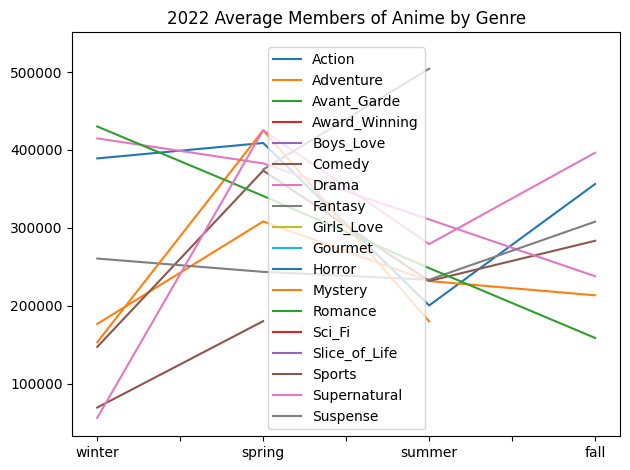

In [555]:
genre_data_pd.plot().line()
plt.title('2022 Average Members of Anime by Genre')
plt.tight_layout()
plt.show()